[source](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)

In [ ]:
import numpy as np
from sympy.matrices import Matrix 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# define dataset
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
#np.round(X, 2)

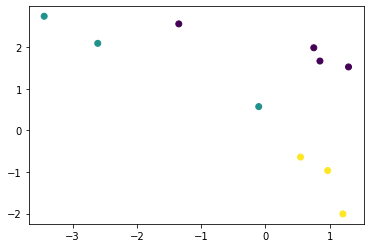

In [ ]:
plt.scatter(*zip(*X), c=y)

In [ ]:
#%%script false
# X = np.array([[1], [2], [3], [4], [5], [6]])
# y = np.array([0, 0, 1, 1, 2, 2])

In [ ]:
X = np.array([[10], [20], [30], [40], [50], [60]])
# y = np.array([0, 0, 1, 1, 2, 2])
y = np.array([0, 2, 2, 2, 1, 1])


In [ ]:
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [ ]:
yhat

array([0, 2, 2, 2, 1, 1])

In [ ]:
np.round(model.predict_proba(X), 2), model.predict(X), 

(array([[0.57, 0.  , 0.43],
        [0.08, 0.  , 0.92],
        [0.  , 0.  , 1.  ],
        [0.  , 0.11, 0.89],
        [0.  , 0.72, 0.28],
        [0.  , 0.78, 0.22]]), array([0, 2, 2, 2, 1, 1]))

Same "one versus all" but using the different commands.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)

In [ ]:
yhat

array([0, 2, 2, 2, 1, 1])

In [ ]:
 y

array([0, 2, 2, 2, 1, 1])

In [ ]:
from plotly import graph_objects as go
lines = []
for y_true, y_pred, i in zip(y, yhat, range(len(yhat))):
  lines.append(go.Scatter3d(x=[y_pred, y_true], y=[i, i], z=[0, 1], mode="lines"))

fig = go.Figure(data=lines)
fig.show()

In [ ]:
np.round(ovr.predict_proba(X), 2), ovr.predict(X)

(array([[0.57, 0.  , 0.43],
        [0.08, 0.  , 0.92],
        [0.  , 0.  , 1.  ],
        [0.  , 0.11, 0.89],
        [0.  , 0.72, 0.28],
        [0.  , 0.78, 0.22]]), array([0, 2, 2, 2, 1, 1]))

In [ ]:
pred_probs = ovr.predict_proba(X)

In [ ]:
pred_probs.shape

(6, 3)

In [ ]:
ovr.estimators_[0].predict_proba(X)

array([[5.62337060e-02, 9.43766294e-01],
       [9.43975971e-01, 5.60240290e-02],
       [9.99790170e-01, 2.09830156e-04],
       [9.99999258e-01, 7.42171650e-07],
       [9.99999997e-01, 2.62452265e-09],
       [1.00000000e+00, 9.28102554e-12]])

In [ ]:
ovr.estimators_[1].predict_proba(X)

array([[9.99999997e-01, 2.55340758e-09],
       [9.99999272e-01, 7.28161401e-07],
       [9.99792391e-01, 2.07608736e-04],
       [9.44093947e-01, 5.59060534e-02],
       [5.59066525e-02, 9.44093347e-01],
       [2.07611092e-04, 9.99792389e-01]])

In [ ]:
ovr.estimators_[2].predict_proba(X)

array([[0.28886735, 0.71113265],
       [0.36806318, 0.63193682],
       [0.4550769 , 0.5449231 ],
       [0.54492311, 0.45507689],
       [0.63193683, 0.36806317],
       [0.71113266, 0.28886734]])

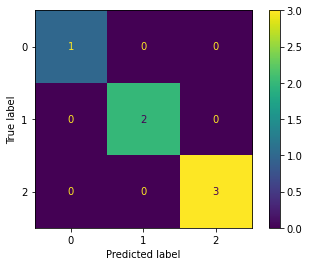

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y, ovr.predict(X)), display_labels=[0, 1, 2]).plot()


In [ ]:
ovr.coef_

array([[-0.56446823],
       [ 0.56530947],
       [-0.03603566]])

In [ ]:
ovr.intercept_

array([[  8.4650445 ],
       [-25.43893174],
       [  1.26124796]])

In [ ]:
ovr.estimators_[2].coef_, ovr.estimators_[2].intercept_

(array([[-0.03603566]]), array([1.26124796]))

In [ ]:
ovr.classes_


array([0, 1, 2])

In [ ]:
lines = []
for y_true, probs, i in zip(y, pred_probs, range(len(pred_probs))):
  for prob, j in zip (probs, range(len(probs))):
    color = 'DarkSlateGrey'
    if j == y_true:
      color = "red"
    lines.append(go.Scatter3d(x=[j, j], y=[i, i], z=[prob, 0], mode="lines", marker=dict(color=color, 
                                                                                         line=dict(width=2, 
                                                                                                   color=color))
    ))


fig = go.Figure(data=lines)
fig.show()

One-Vs-One for Multi-Class Classification

In [ ]:
from sklearn.svm import SVC

model = SVC(decision_function_shape='ovo', probability=True)
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [ ]:
yhat[:10]

array([2, 2, 2, 2, 1, 1])

In [ ]:
 y[:10]

array([0, 2, 2, 2, 1, 1])

In [ ]:
np.round(model.predict_proba(X), 2), model.predict(X) 

(array([[0.08, 0.35, 0.57],
        [0.12, 0.28, 0.6 ],
        [0.13, 0.28, 0.59],
        [0.14, 0.4 , 0.46],
        [0.33, 0.35, 0.31],
        [0.35, 0.38, 0.27]]), array([2, 2, 2, 2, 1, 1]))

 OneVsOneClassifier 

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
# define dataset

model = LogisticRegression()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X, y)
# make predictions
yhat = ovo.predict(X)

In [ ]:
yhat

array([0, 2, 2, 2, 1, 1])

In [ ]:
 y

array([0, 2, 2, 2, 1, 1])

In [ ]:
ovo.estimators_[0].predict_proba(X)

array([[9.93733425e-01, 6.26657522e-03],
       [9.25127456e-01, 7.48725441e-02],
       [4.90513520e-01, 5.09486480e-01],
       [6.97818482e-02, 9.30218152e-01],
       [5.81120055e-03, 9.94188799e-01],
       [4.55238081e-04, 9.99544762e-01]])

In [ ]:
ovo.estimators_[1].predict_proba(X)

array([[9.43768613e-01, 5.62313874e-02],
       [5.60213328e-02, 9.43978667e-01],
       [2.09799601e-04, 9.99790200e-01],
       [7.41993305e-07, 9.99999258e-01],
       [2.62364352e-09, 9.99999997e-01],
       [9.27702359e-12, 1.00000000e+00]])

In [ ]:
ovo.estimators_[2].predict_proba(X)

array([[2.55388155e-09, 9.99999997e-01],
       [7.28257296e-07, 9.99999272e-01],
       [2.07624877e-04, 9.99792375e-01],
       [5.59073118e-02, 9.44092688e-01],
       [9.44091760e-01, 5.59082403e-02],
       [9.99792371e-01, 2.07628529e-04]])

In [ ]:
ovo.predict(X).reshape(-1, 1)
# There is no predict proba here

array([[0],
       [2],
       [2],
       [2],
       [1],
       [1]])

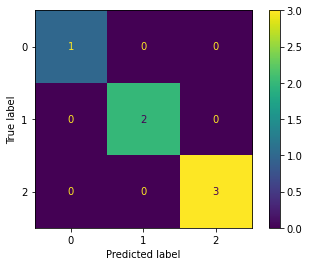

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y, ovo.predict(X)), display_labels=[0, 1, 2]).plot()